# Advanced Plotting
## PyIU Advanced Python Workshop
Authors: Kristin Baker, Jessica Ranshaw

Last modified: 10/21/24

Data visualization (i.e. plotting) is one of the most important aspect in coding as that is the main way you convey important data to your audience. In this section, I will go over important aspects of a plot and how to implented them via code!

First, we will begin by importing the python package for plotting data: "Matplotlib". If you are interested in learning more about Matplotlib beyond this tutorial, you can go to https://matplotlib.org/stable/gallery/index

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### Plotting Basics with Pyplot (plt)

There are two main plotting classes in Matplotlib: Pyplot and Axes. They both have their own pros and cons. Pyplot is sufficient for simple plotting task while Axes is better for more advanced plotting (e.g., using subplots, color bars, etc.). First, there is a quick demo of Pyplot as a basics to plotting review, but we will focus on advanced plotting with Axes.

When making plots, it is best practice to include the following in your plot:
1) axis label
2) plot tietl
3) legends (especially when working with multiple data set


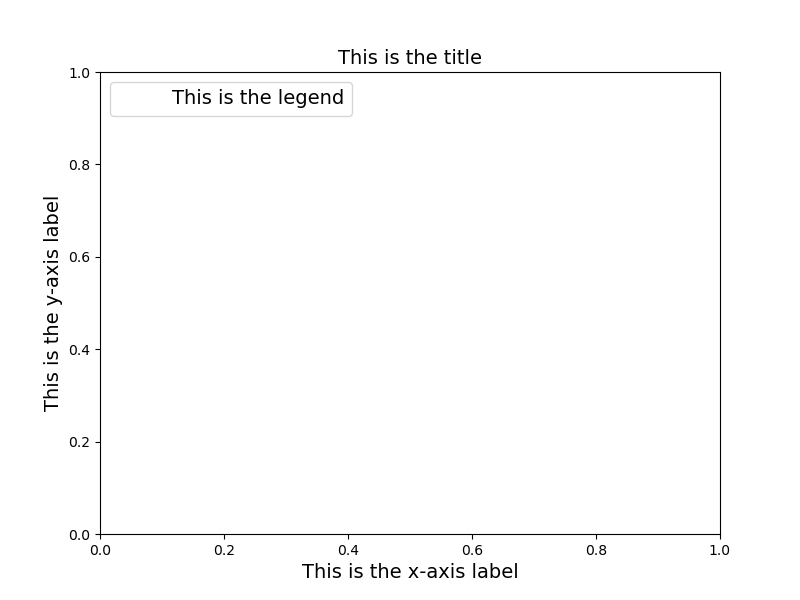.

There are different types of functions for different types of plotting. For example, when plotting discrete data points (e.g., a scatter plot), you would use `plt.scatter()`. In this case, we want to replicate the Planck curves shown at the beginning of the module, so we will use the `plt.plot` function which draws a line from point to point.

Within the plot function, we can specify certain parameters using arguments. The main parameters you want to set everytime are:


*   Color
*   Line Width
*   Line Style
*   Label

The color, line width, and line style have to do with aesthetic of the plot (which is just as important as the data in the plot!). However, the label will set what information is relayed in the legend.

In [ ]:
## Generating data
x_data1 = np.linspace(0,20,20)
## plot
y_data1 = -(x_data1-10)**2 + 100

There are many different ways to plot data (e.g., lines, scatter plots, histograms, etc.), but we will focus on plotting a line.

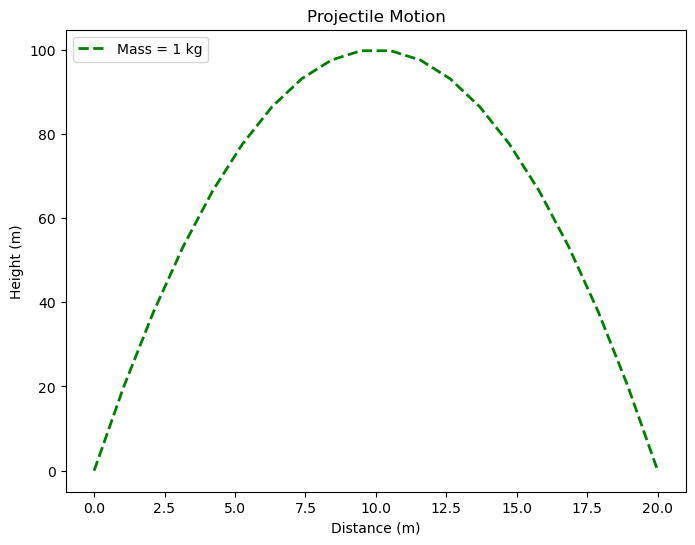

In [ ]:
## set the figure (width, height)
fig = plt.figure(figsize = (8,6))

## plot the data
plt.plot(x_data1,y_data1,color = 'green', linewidth = 2, linestyle = '--', label="Mass = 1 kg")

## set the x axis label
plt.xlabel("Distance (m)")

## set the y axis label
plt.ylabel("Height (m)")

## set the plot title
plt.title("Projectile Motion")

## set the legend
plt.legend(loc = "upper left")

## save the figure
# plt.savefig("projectile_motion.png")

### Advanced Plotting with Axes (ax)

Axes allows us to have more control of our figures and plots. This is most helpful for research plots.

We can import some helpful functions within the matplotlib package that we can use with Axes.

In [ ]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as ticker

## subplots
import matplotlib.gridspec as gridspec ## allows us to customize subplots

## color maps
from matplotlib import colormaps
import matplotlib.cm as cm

#### Subplots

Using ax allows you to use gridspec (https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html), a versatile tool for creating subplots.

In [ ]:
## Let's generate some data for this section
### population 1
np.random.seed(1240)
rand_hist1 = np.random.randint(1,high= 100, size = 100)

### population 2
np.random.seed(87)
rand_hist2 = np.random.randint(1,high= 100, size = 100)

list1 = [rand_hist1,rand_hist2]

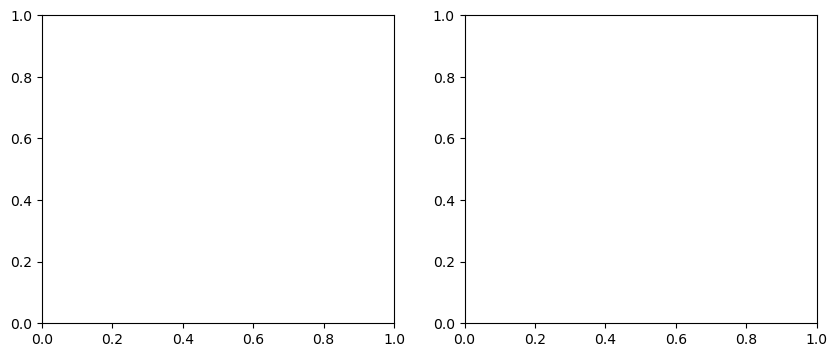

In [ ]:
## set the size of the overall figure
fig = plt.figure(figsize = (10,4))

## set number of subplots - ncols = numbers of columns, nrows = number of rows
grid = gridspec.GridSpec(ncols=2, nrows=1, figure = fig)

## set up subplots
ax0 = fig.add_subplot(grid[0,0])
ax1 = fig.add_subplot(grid[0,1])

Gridspec allows us more control of our subplots.

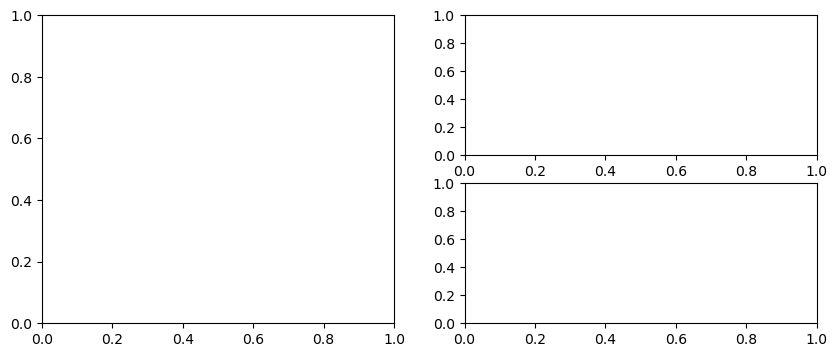

In [ ]:
 ## set the size of the overall figure
fig = plt.figure(figsize = (10,4))

## set number of subplots
grid = gridspec.GridSpec(ncols=2, nrows=2, figure = fig)

## set up subplots
ax0 = fig.add_subplot(grid[:,0])
ax1 = fig.add_subplot(grid[0,1])
ax2 = fig.add_subplot(grid[1,1])
ax = [ax0,ax1,ax2]


In this section, we will plot histograms in our subplots. See the ax.hist documentation for more ways to customize histograms!

Text(0.5, 0.98, 'Randomly Generated Distributions')

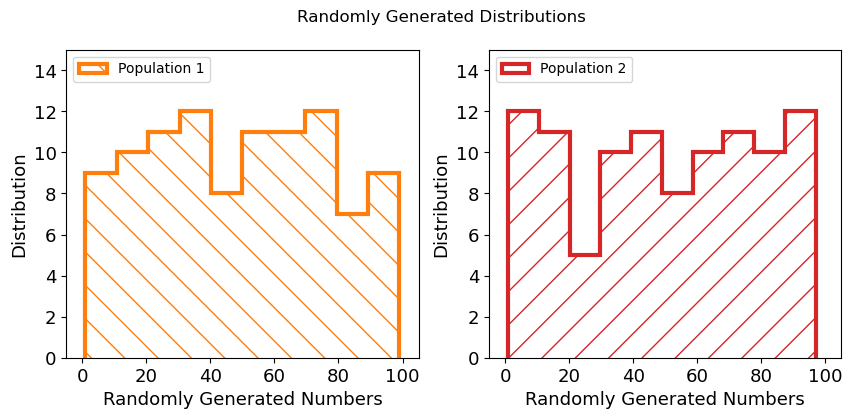

In [ ]:
 ## set the size of the overall figure
fig = plt.figure(figsize = (10,4))

## set number of subplots
grid = gridspec.GridSpec(ncols=2, nrows=1, figure = fig)

## set up subplots
ax0 = fig.add_subplot(grid[0,0])
ax1 = fig.add_subplot(grid[0,1])
ax = [ax0,ax1]

## customize the histogram by setting the histtype, linewidth, color, and hatch
ax0.hist(rand_hist1,histtype='step',lw=3,color = 'tab:orange',hatch = '\\',label = 'Population 1')
ax1.hist(rand_hist2,histtype='step',lw=3,color = 'tab:red',hatch = '/',label = 'Population 2')

## when you are working with subplots and you want all of them to have the same paramters,
### you can use a for loop to set them more efficiently
for i in range(len(ax)):
  ax[i].tick_params(labelsize=13)
  ax[i].set_xlabel("Randomly Generated Numbers",fontsize = 13)
  ax[i].set_ylabel("Distribution",fontsize = 13)
  ax[i].set_ylim(0,15)
  ax[i].set_xlim(-5,105)
  ax[i].legend(loc = 'upper left')

## set the figure title
fig.suptitle("Randomly Generated Distributions")

#### Tick Customization

In this section, we will focus on customizing the x- and y-axes, particularly the tick marks!

In [ ]:
## Generate data
lam1 = 1000   # m = 1000A
lam2 = 30000   # m = 30000A (3 microns)
D_WIYN = 0.9e10   # m
D_HST  = 2.4e10   # m
D_KECK = 10.0e10  # m

def res_func(lam, D):
    theta = ((1.22*lam)/D) * 206265
    return theta

lam = np.linspace(lam1,lam2,100000)
lam_ang = np.linspace(np.log10(1000),np.log10(30000),100000)

theta_WIYN = res_func(lam,D_WIYN)
theta_HST = res_func(lam,D_HST)
theta_KECK = res_func(lam,D_KECK)

The function `ax.tick_params` lets us customize the appearance of ticks, tick labels, and gridlines. The main parameters include:
* labelsize = the font size of your tick labels
* axis = the axis you are customizing ('x','y', or 'both')
* which = the group of ticks you are customizing ('major''minor', or 'both')
* length = how long you want the tick marks to be
* width = how wide you want the tick marks to be

and many more!

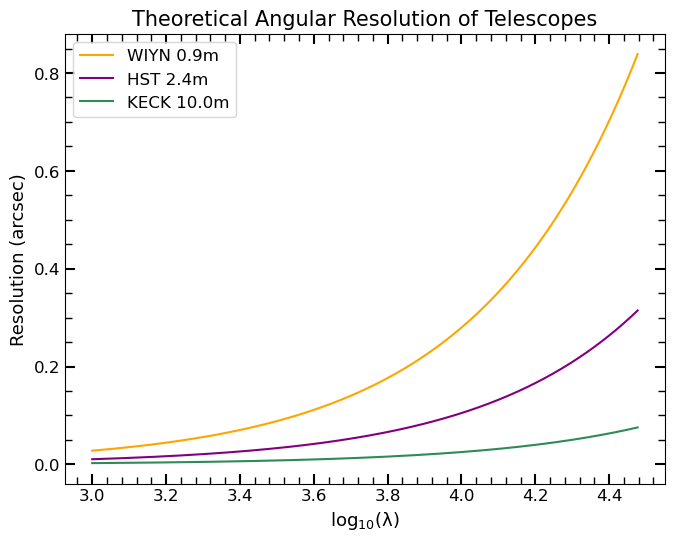

In [ ]:
## set the figure (width, height)
fig = plt.figure(figsize =(6,4.5))
ax = fig.add_axes([0,0,1,1])

## plot the data
ax.plot(np.log10(lam),theta_WIYN, color='orange', label = 'WIYN 0.9m')
ax.plot(np.log10(lam),theta_HST, color='purple', label = 'HST 2.4m')
ax.plot(np.log10(lam),theta_KECK, color='seagreen', label = 'KECK 10.0m')

## Give the plot its basics
ax.set_xlabel("log$_{10}$(λ)",fontsize=13) ## x-axis = log10 of wavelength
ax.set_ylabel("Resolution (arcsec)",fontsize=13)  ## y-axis = angular resolution
ax.legend(loc="upper left",fontsize=13)
ax.set_title("Theoretical Angular Resolution of Telescopes",fontsize=15)

## Now we can customize! Let's adjust tick marks
## set the number of ticks = 1 major + # minor (5 = 1 major tick and 4 minor)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

## adjust tick label parameters
ax.tick_params(labelsize = 12, direction='in')

## adjust the length of the "major" tick marks (i.e., the tick marks that will be labeled)
ax.tick_params(which='major', length=7,width=1.5,direction='in')

## adjust the length of 'minor' tick marks  (i.e., the tick marks that will not be labeled)
ax.tick_params(axis = 'both',which='minor', length=5,width=1,direction='in')

ax.legend(loc='upper left',fontsize=12)

## Let's say you want tick marks on the other x and y axes
### this makes the right x and top y axes have the same values as the standard x- and y-axes
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')


Now let's say you want to have different values represented on different axes. The Axes function alows us to easily do this! In the next plot, we will have log$_{10}$(λ) on the standard x-axis and wavelength (λ) in microns on the top x-axis.

Text(0.5, 0, 'Wavelength (µ)')

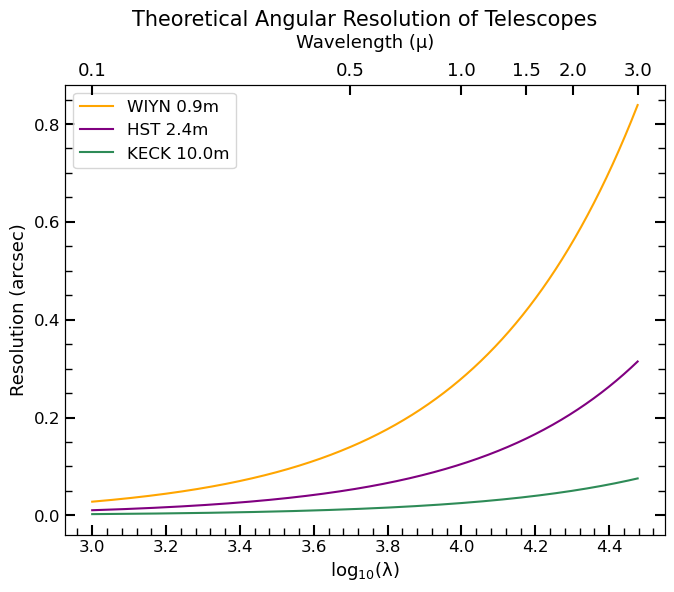

In [ ]:
# now let's say you want to have different values represented on different axes
fig = plt.figure(figsize =(6,4.5))
ax = fig.add_axes([0,0,1,1])

ax.plot(np.log10(lam),theta_WIYN, color='orange', label = 'WIYN 0.9m')
ax.plot(np.log10(lam),theta_HST, color='purple', label = 'HST 2.4m')
ax.plot(np.log10(lam),theta_KECK, color='seagreen', label = 'KECK 10.0m')

## Give the plot its basics
ax.set_xlabel("log$_{10}$(λ)",fontsize=13) ## x-axis = log10 of wavelength
ax.set_ylabel("Resolution (arcsec)",fontsize=13)  ## y-axis = angular resolution
# ax.legend(loc="upper left",fontsize=13)
ax.set_title("Theoretical Angular Resolution of Telescopes",fontsize=15)

## Let's adjus the tick marks ##
ax.tick_params(labelsize = 12, direction='in') ## adjust tick mark parameters
ax.xaxis.set_minor_locator(AutoMinorLocator(5)) ## include minor tick marks
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(which='major', length=7,width=1.5,direction='in') ## adjust the length of major tick marks
ax.tick_params(axis = 'both',which='minor', length=5,width=1,direction='in') ## adjust the length of minor tick marks
ax.legend(loc='upper left',fontsize=12)

ax.yaxis.set_ticks_position('both')

## however to do different things on the top x-axis, we need to mirror the
#### top x-axis and set its own parameters

## choose the wavelengths you want represented
lam2 = [1000,5000,10000,15000,20000,30000]

## create corresponding ticks in the log(lam) space of the standard x-axis
lam3 = np.log10(lam2)

## mirror the x axis
ax1 = ax.twiny()

## set the xticks
ax1.set_xticks(lam3)
ax1.set_xbound(ax.get_xbound())

## replace the tick labels with the wavelengths in microns
ax1.set_xticklabels([(round(10**lam2))/10000 for lam2 in lam3])

## set the other parameters
ax1.tick_params(which='major', length=7,width=1.5,direction='in')
ax1.tick_params(labelsize = 13, direction='in')
ax1.set_xlabel("Wavelength (µ)",labelpad=10, fontsize=13)


#### More Fun... Color Maps

We can create color maps using the matplib function (https://matplotlib.org/stable/users/explain/colors/colormaps.html)

In [ ]:
## Lets generate data for this section

### x
np.random.seed(1240)
NII = (np.random.randint(-80,high= 25, size = 25))/100

### y
np.random.seed(87)
OIII = (np.random.randint(4,high= 13, size = 25))/10

### color scale
np.random.seed(87)
color_scale = (np.random.randint(830,high= 890, size = 25))/100

C:\Users\Kristin\AppData\Local\Temp\ipykernel_20344\2318826476.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('viridis')  ## choose color scheme


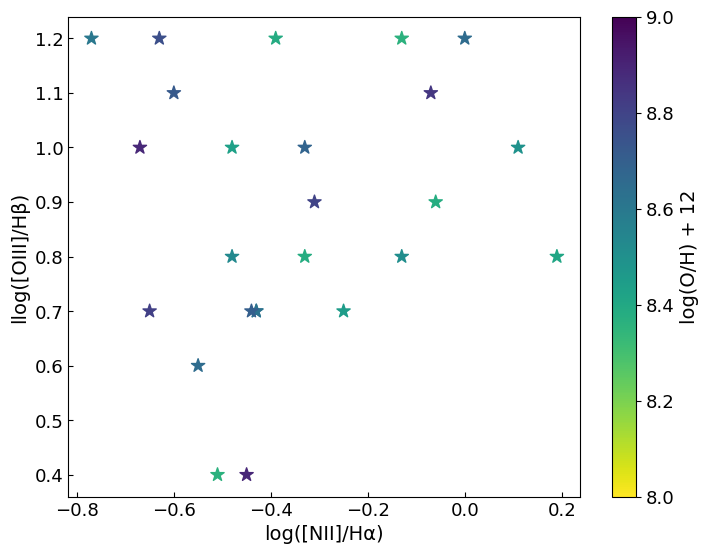

In [ ]:
orig_map=plt.cm.get_cmap('viridis')  ## choose color scheme
reversed_map = orig_map.reversed() ## you can flip the order, in this example higher values are darker colors

fig3 = plt.figure()
ax = fig3.add_axes([0,0,1,1])

## create the color bar
cax = ax.scatter(NII,OIII,c = color_scale,s = 100,marker = '*',cmap=reversed_map,vmin=8.0, vmax=9.0)
cbar1 = plt.colorbar(cax,orientation="vertical")
cbar1.ax.tick_params(labelsize=13)
cbar1.set_label(label="log(O/H) + 12",size = 14)

ax.set_xlabel("log([NII]/H\u03B1)",fontsize=14) ## you can introduce special characters like greek letters with their unicode
ax.set_ylabel("log([OIII]/H\u03B2)",fontsize =14)
ax.tick_params(labelsize = 13, direction='in')

#### Other Resources
1.   Inset Plots - https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.inset_axes.html

2.   3D Plots - https://www.geeksforgeeks.org/three-dimensional-plotting-in-python-using-matplotlib/

3.   Animations - https://matplotlib.org/stable/users/explain/animations/animations.html



## Explore all you can do with Matplotlib here: https://matplotlib.org/stable/gallery/index.html
